In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
data_path = '../example_data/data/andor.asc'

In [57]:
def _load_ANDOR_image(path:str)->np.ndarray:
        """Loads an image produced by the ANDOR synchrotron spectroscopy camera from some specified
        path location.
        
        Parameters
        ----------
            path : str
                The path to the image data.
        """

        image = np.genfromtxt(data_path, skip_footer=41)


        #EXTRACT THE FIRST COLUMN, WHICH CONTAIN WAVELENGTHS IN NM- this is "pixels_y"
        wavelengths = image[:, 0] #
        # print(wavelengths[1]-wavelengths[0])
        # print(wavelengths[-1]-wavelengths[-2])
        print(wavelengths[1]-wavelengths[0])
        print(wavelengths[-3]-wavelengths[-4])

        #Index the pixels from 0 to the length of the x axis
        pixels_x = np.arange(0, len(image[0]))
        print(pixels_x)

        # trim away the first column to remove wavelength data
        image = image[:, 1:]

        return image, pixels_x, wavelengths

image, pixels_x, pixels_y = _load_ANDOR_image(data_path)


0.031159999999999854
0.030579999999986285
[   0    1    2 ... 1022 1023 1024]


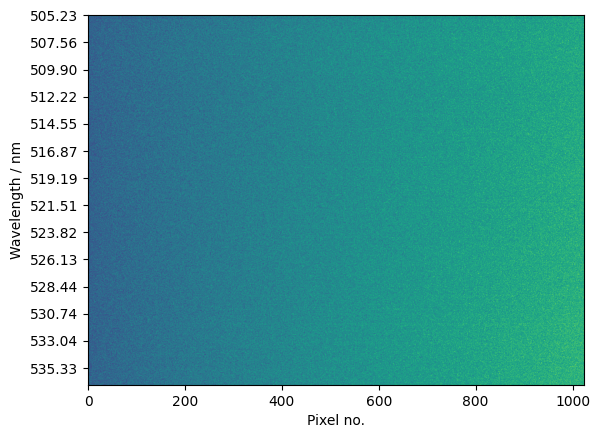

In [62]:
def plot_andor_image(img, pixels_x, pixels_y):
    step = 75

    y_tick_loc = np.arange(0, len(pixels_y), step=step)
    pixels_y_rounded = [f"{pixel:.2f}" for pixel in pixels_y] 

    fig, ax = plt.subplots()
    ax.imshow(img, aspect='auto')
    ax.set_yticks(y_tick_loc)
    ax.set_yticklabels(pixels_y_rounded[::step])
    ax.set_xlabel("Pixel no.")
    ax.set_ylabel("Wavelength / nm")
    plt.show()

plot_andor_image(image, pixels_x, pixels_y)